In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime

In [1]:
import tensorflow as tf
print("Num GPUs Available", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available 0


In [2]:
df = pd.read_excel("data.xlsx", sheet_name="data")
df.head()

,From Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene
0,2019-01-01 00:00:00,0.548004,0.837675,0.386063,0.183578,0.377457,0.311067,0.099945,0.59,0.008504,0.391534
1,2019-01-01 00:15:00,0.548004,0.837675,0.447938,0.177646,0.426394,0.304088,0.088901,0.60,0.011006,0.373016
2,2019-01-01 00:30:00,0.548004,0.837675,0.385062,0.201686,0.382471,0.333500,0.088349,0.52,0.011006,0.365079
3,2019-01-01 00:45:00,0.448759,0.658317,0.440328,0.196691,0.426394,0.331007,0.085036,0.54,0.011006,0.359788
4,2019-01-01 01:00:00,0.448759,0.658317,0.422307,0.175148,0.404332,0.327517,0.083932,0.50,0.011131,0.333333


In [3]:
df = df.drop(['From Date'], axis = 1)
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene
0,0.548004,0.837675,0.386063,0.183578,0.377457,0.311067,0.099945,0.59,0.008504,0.391534
1,0.548004,0.837675,0.447938,0.177646,0.426394,0.304088,0.088901,0.60,0.011006,0.373016
2,0.548004,0.837675,0.385062,0.201686,0.382471,0.333500,0.088349,0.52,0.011006,0.365079
3,0.448759,0.658317,0.440328,0.196691,0.426394,0.331007,0.085036,0.54,0.011006,0.359788
4,0.448759,0.658317,0.422307,0.175148,0.404332,0.327517,0.083932,0.50,0.011131,0.333333


In [3]:
timestamp_s = df['From Date'].map(datetime.datetime.timestamp)

In [4]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))
df = df.set_index('From Date')
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Day sin,Day cos,Year sin,Year cos
From Date,,,,,,,,,,,,,,
2019-01-01 00:00:00,0.548004,0.837675,0.386063,0.183578,0.377457,0.311067,0.099945,0.59,0.008504,0.391534,-0.991445,0.130526,-0.001921,0.999998
2019-01-01 00:15:00,0.548004,0.837675,0.447938,0.177646,0.426394,0.304088,0.088901,0.60,0.011006,0.373016,-0.980785,0.195090,-0.001742,0.999998
2019-01-01 00:30:00,0.548004,0.837675,0.385062,0.201686,0.382471,0.333500,0.088349,0.52,0.011006,0.365079,-0.965926,0.258819,-0.001563,0.999999
2019-01-01 00:45:00,0.448759,0.658317,0.440328,0.196691,0.426394,0.331007,0.085036,0.54,0.011006,0.359788,-0.946930,0.321439,-0.001383,0.999999
2019-01-01 01:00:00,0.448759,0.658317,0.422307,0.175148,0.404332,0.327517,0.083932,0.50,0.011131,0.333333,-0.923880,0.382683,-0.001204,0.999999


Text(0.5, 1.0, 'Time of day signal')

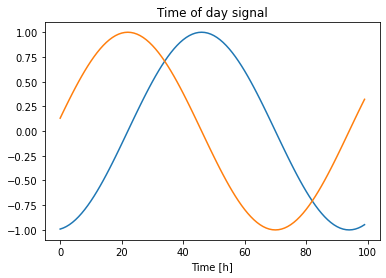

In [5]:
plt.plot(np.array(df['Day sin'])[:100])
plt.plot(np.array(df['Day cos'])[:100])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

In [4]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]
num_features

10

In [6]:
df1 = df.copy()
df1 = df1.drop(['Day sin', 'Day cos','Year sin','Year cos'], axis = 1)
df1.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene
From Date,,,,,,,,,,
2019-01-01 00:00:00,0.548004,0.837675,0.386063,0.183578,0.377457,0.311067,0.099945,0.59,0.008504,0.391534
2019-01-01 00:15:00,0.548004,0.837675,0.447938,0.177646,0.426394,0.304088,0.088901,0.60,0.011006,0.373016
2019-01-01 00:30:00,0.548004,0.837675,0.385062,0.201686,0.382471,0.333500,0.088349,0.52,0.011006,0.365079
2019-01-01 00:45:00,0.448759,0.658317,0.440328,0.196691,0.426394,0.331007,0.085036,0.54,0.011006,0.359788
2019-01-01 01:00:00,0.448759,0.658317,0.422307,0.175148,0.404332,0.327517,0.083932,0.50,0.011131,0.333333


In [7]:
column_indices = {name: i for i, name in enumerate(df1.columns)}

n = len(df1)
train_df = df1[0:int(n*0.7)]
val_df = df1[int(n*0.7):int(n*0.9)]
test_df = df1[int(n*0.9):]

num_features = df1.shape[1]
num_features

10

In [8]:
df1[0:2]

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene
From Date,,,,,,,,,,
2019-01-01 00:00:00,0.548004,0.837675,0.386063,0.183578,0.377457,0.311067,0.099945,0.59,0.008504,0.391534
2019-01-01 00:15:00,0.548004,0.837675,0.447938,0.177646,0.426394,0.304088,0.088901,0.60,0.011006,0.373016


In [5]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [6]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [7]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [8]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [16]:
w2 = WindowGenerator(input_width=16, label_width=1, shift=1, train_df=train_df2, val_df=val_df2, test_df=test_df2)
w2

Total window size: 17
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Label indices: [16]
Label column name(s): None

In [17]:
w2.train.element_spec

(TensorSpec(shape=(None, 16, 14), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 14), dtype=tf.float32, name=None))

In [9]:
w1 = WindowGenerator(input_width=16, label_width=1, shift=1)
w1

Total window size: 17
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Label indices: [16]
Label column name(s): None

In [13]:
w1.train.element_spec

Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Label indices: [16]
Label column name(s): None> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Label indices: [16]
Label column name(s): None> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


(TensorSpec(shape=(None, 16, 10), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 10), dtype=tf.float32, name=None))

In [10]:
rnn_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.SimpleRNN(32),
    # Shape => [batch, time, features]
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.Reshape([1, -1]),
])

In [10]:
gru_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.GRU(32),
    # Shape => [batch, time, features]
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.Reshape([1, -1]),
])

In [62]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32),
    # Shape => [batch, time, features]
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.Reshape([1, -1]),
])

In [11]:
print('Input shape:', w1.example[0].shape)
print('Output shape:', rnn_model(w1.example[0]).shape)

Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Label indices: [16]
Label column name(s): None> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Label indices: [16]
Label column name(s): None> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Input shape: (32, 16, 10)
Output shape: (32, 1, 10)


In [27]:
for example_inputs, example_labels in w1.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 16, 10)
Labels shape (batch, time, features): (32, 1, 10)


In [13]:
import IPython
import IPython.display

In [12]:
def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [14]:
MAX_EPOCHS=15
history = compile_and_fit(rnn_model, w1)

IPython.display.clear_output()
val_performance = rnn_model.evaluate(w1.val)
performance = rnn_model.evaluate(w1.test, verbose=0)

439/439 [==============================] - 1s 2ms/step - loss: 4.2502e-04 - mean_absolute_error: 0.0112


In [66]:
val_perf = lstm_model.evaluate(w1.val)
perf = lstm_model.evaluate(w1.test, verbose=0)
val_perf, perf

439/439 [==============================] - 3s 6ms/step - loss: 4.1966e-04 - mean_absolute_error: 0.0112


([0.00041966329445131123, 0.011244810186326504],
 [0.0015647377585992217, 0.021387439221143723])

In [67]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                5504      
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
_________________________________________________________________
reshape_1 (Reshape)          (None, 1, 10)             0         
Total params: 5,834
Trainable params: 5,834
Non-trainable params: 0
_________________________________________________________________


In [92]:
lstm_model(train_df[:16].values[np.newaxis,...]).shape, train_df.values[16]

(TensorShape([1, 1, 10]),
 array([0.24271845, 0.34168337, 0.12254706, 0.18326569, 0.16225431,
        0.28414756, 0.06239647, 0.18      , 0.006003  , 0.14285714]))

In [15]:
inputdata = np.array([test_df[i:i+16].values for i in range(test_df.shape[0] - 16)])
inputdata.shape

(7002, 16, 10)

In [16]:
y_pred = rnn_model.predict(inputdata)
y_pred.shape

(7002, 1, 10)

In [17]:
y_test = test_df[16:].values
y_test.shape

(7002, 10)

In [18]:
y_predr = y_pred.reshape([-1,10])
y_predr.shape

(7002, 10)

In [19]:
y_predr[28], y_test[28]

(array([0.15179229, 0.4405024 , 0.08677948, 0.24169233, 0.15373874,
        0.24404569, 0.07063574, 0.12266856, 0.05666519, 0.1151308 ],
       dtype=float32),
 array([0.14239482, 0.44388778, 0.08470164, 0.26038089, 0.15724027,
        0.24675972, 0.07178355, 0.12      , 0.05452726, 0.12962963]))

In [110]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r_square = r2_score(y_test, y_predr)

print("R^2 :",r_square)

R^2 : 0.944267206509914


In [21]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r_square = r2_score(y_test, y_predr)

print("GRU R^2 :",r_square)

GRU R^2 : 0.9456603784676176


In [20]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r_square = r2_score(y_test, y_predr)

print("RNN R^2 :",r_square)

RNN R^2 : 0.9416489590067089


In [111]:
def fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')


  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [112]:
MAX_EPOCHS = 30
history = fit(lstm_model, w1)

IPython.display.clear_output()
val_performance = lstm_model.evaluate(w1.val)
performance = lstm_model.evaluate(w1.test, verbose=0)

439/439 [==============================] - 1s 3ms/step - loss: 3.9773e-04 - mean_absolute_error: 0.0104
